# 타이타닉 데이터 분석

타이타닉 생존자 예측을 위한 데이터 분석을 진행하겠습니다. 먼저 분석을 위해서 훈련용(train.csv) 데이터를 불러 오겠습니다. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 훈련용 데이터 불러오기 
train = pd.read_csv("https://raw.githubusercontent.com/developer-sdk/kaggle-python-beginner/master/datas/kaggle-titanic/train.csv")
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 결측치 확인 
데이터의 이상 여부를 확인하기 위해 먼저 결측치를 확인하습니다. 결측치, 이상치는 분석 결과를 왜곡 시킬 수 있기 때문에 적절한 값으로 채워주거나, 분석 대상에서 제외해야 합니다. 

아래에서 Age, Cabin, Embarked 이 3개의 데이터에서 결측치가 확인되었습니다. 이 데이터는 분석하기 전에 적절한 값으로 채워주겠습니다. 

> Cabin의 경우 전체 데이터 건수에 비해 많은 값들이 비어 있으므로(891건 중 687건), 분석 대상에서 제외하여 도 될 것입니다. 하지만 여기서는 데이터 분석 연습을 위해 적잘한 값으로 채운후 전처리를 하도록 하겠습니다. 

In [2]:
# 데이터 프레임의 null 값의 개수를 세어 줌 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 분석용 차트 생성 함수
생존 여부(Survived)와 각 칼럼 간의 관계를 파이 차트로 분석하기 위해 공통 함수를 아래와 같이 구현하였습니다. 

+ show_pie_chart
    + survived_crosstab, pie_chart 함수를 이용하여 파이차트 생성 
+ survived_crosstab
    + col_name과 Survived 간의 교차 도표 생성
    + 생존 여부를 보기 편하게 문자로 변환 
+ pie_chart
    + 파이 차트 생성 

In [2]:
def show_pie_chart(df, col_name):
    '''col_name과 Survived 간의 교차 도표를 생성하고, Pie Chart를 출력'''
    colname_survived = survived_crosstab(train, col_name)
    pie_chart(colname_survived)
    return colname_survived

def survived_crosstab(df, col_name):
    '''col_name과 Survived간의 교차도표 생성'''
    feature_survived = pd.crosstab(df[col_name], df['Survived'])
    feature_survived.columns = feature_survived.columns.map({0:"Dead", 1:"Alive"})
    return feature_survived

def pie_chart(feature_survived):
    '''
    pie_chart 생성
    pcol, prow = 차트를 출력할 개수. pcol * prow 만큼의 차트 출력 
    '''
    frows, fcols = feature_survived.shape
    pcol = 3
    prow = (frows/pcol + frows%pcol)
    plot_height = prow * 2.5
    plt.figure(figsize=(8, plot_height))
    
    for row in range(0, frows):
        plt.subplot(prow, pcol, row+1)
        
        index_name = feature_survived.index[row]
        plt.pie(feature_survived.loc[index_name], labels=feature_survived.loc[index_name].index, autopct='%1.1f%%')
        plt.title("{0}' survived".format(index_name))
        
    plt.show()

# Sex
성별과 생존률의 관계를 알아보겠습니다.

> 남성에 비해 여성의 생존률이 높은 것을 확인할 수 있습니다. 

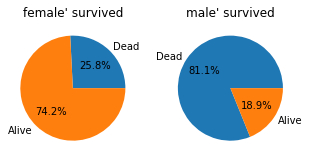

Survived,Dead,Alive
Sex,,
female,81,233
male,468,109


In [5]:
c = show_pie_chart(train, 'Sex')
c

# Embarked
탑승항과 생존률의 관계를 알아보겠습니다. 

> C > Q > S 순으로 생존률이 높은 것을 알 수 있습니다. 

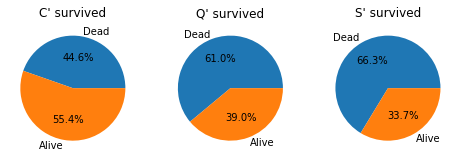

Survived,Dead,Alive
Embarked,,
C,75,93
Q,47,30
S,427,217


In [6]:
c = show_pie_chart(train, 'Embarked')
c

# Name
이름은 그대로는 분석에 사용할 수 없지만 이름에서 호칭을 추출할 수 있습니다. 아래와 같은 이름에서 Mr., Miss. 같은 호칭을 추출할 수 있습니다. 

+ Braund, Mr. Owen Harris
+ Heikkinen, Miss. Laina

아래와 같이 정규식으로 탑승자의 호칭(Title)을 추출하겠습니다. 

In [8]:
# 호칭 추출 
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.')
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Ms            1
Lady          1
Mme           1
Jonkheer      1
Don           1
Sir           1
Countess      1
Capt          1
Name: Title, dtype: int64

추출한 호칭에서 데이터가 많은 MR, Miss, Mrs, Master는 그대로 두고 나머지는 Other로 변경합니다. 동시에 프랑스어로 된 호칭도 변경합니다. 

> 생존률을 비교해 보면 Miss, Mrs에 비해 Mr의 생존률이 낮은 것을 확인할 수 있습니다. 

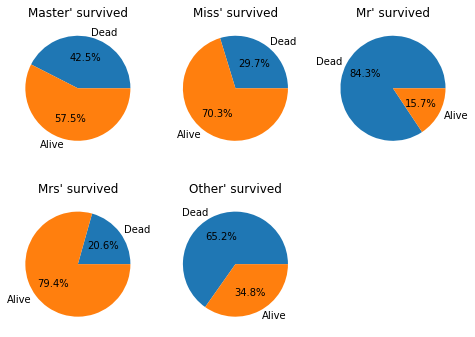

Survived,Dead,Alive
Title,,
Master,17,23
Miss,55,130
Mr,436,81
Mrs,26,100
Other,15,8


In [9]:
train['Title'] = train['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer', 'Lady','Major', 'Rev', 'Sir'], 'Other')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')
train['Title'] = train['Title'].replace('Ms', 'Miss')   
train['Title'].value_counts()

c = show_pie_chart(train, 'Title')
c

# Age
나이와 생존률의 관계를 알아보겠습니다. 먼저 나이에 존재하는 결측치를 호칭과 나이로 구한 나이의 평균값으로 채워 줍니다. 그리고 나이를 `qcut`을 이용하여 8개의 구간으로 분리하여 나이 카테고리(AgeCategory)로 만들어 줍니다. 

> 나이가 어릴 수록 생존률이 약간 높은 것을 알 수 있습니다. 그리고 결측치가 많이 포함된 데이터는 생존률이 떨어지는 것을 알 수 있습니다. 

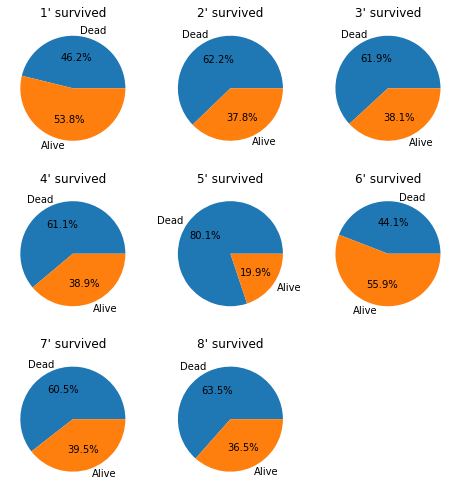

Survived,Dead,Alive
AgeCategory,,
1,54,63
2,79,48
3,60,37
4,66,42
5,125,31
6,30,38
7,69,45
8,66,38


In [10]:
meanAge = train[['Title', 'Age']].groupby(['Title']).mean()
for index, row in meanAge.iterrows():
    nullIndex = train[(train.Title == index) & (train.Age.isnull())].index
    train.loc[nullIndex, 'Age'] = row[0]
    
train['AgeCategory'] = pd.qcut(train.Age, 8, labels=range(1, 9))
train.AgeCategory = train.AgeCategory.astype(int)

c = show_pie_chart(train, 'AgeCategory')
c

# Cabin
방 번호와 생존률의 관계를 알아보겠습니다. 방번호의 결측치는 N으로 채우고, 방 번호의 첫 영문자만 때어내서 선택한 뒤 숫자로 카테고리화 합니다. 

> 방 번호가 낮아 질 수록 생존률이 떨어지는 것을 알 수 있습니다. 

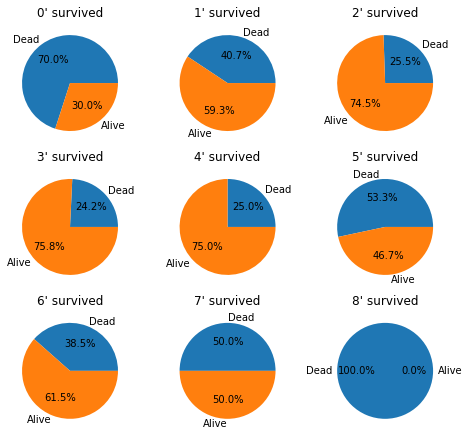

Survived,Dead,Alive
CabinCategory,,
0,481,206
1,24,35
2,12,35
3,8,25
4,8,24
5,8,7
6,5,8
7,2,2
8,1,0


In [11]:
train.Cabin.fillna('N', inplace=True)
train["CabinCategory"] = train["Cabin"].str.slice(start=0, stop=1)  
train["CabinCategory"] = train['CabinCategory'].map({ "N": 0, "C": 1, "B": 2, "D": 3, "E": 4, "A": 5, "F": 6, "G": 7, "T": 8 })

c = show_pie_chart(train, 'CabinCategory')
c

# Fare
운임과 생존률의 관계를 알아 보겠습니다. 운임의 결측치는 0으로 채우고 `qcut`을 이용하여 8개의 구간으로 분리하여 카테고리로 만들어 줍니다. 

> 운임이 높을 수록 생존률이 높아지는 것을 알 수 있습니다. 

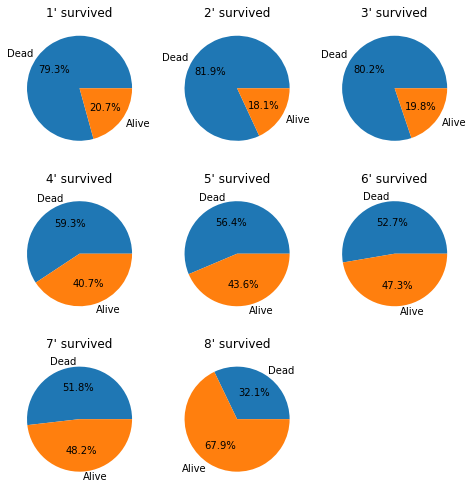

Survived,Dead,Alive
FareCategory,,
1,111,29
2,68,15
3,89,22
4,67,46
5,62,48
6,59,53
7,57,53
8,36,76


In [12]:
train.Fare.fillna(0) # test.csv 데이터에 결측치가 존재함.
train['FareCategory'] = pd.qcut(train.Fare, 8, labels=range(1, 9))
train.FareCategory = train.FareCategory.astype(int)

c = show_pie_chart(train, 'FareCategory')
c

# SibSp, Parch
형제/자매 여부와 부모/자식 여부는 모두 더해서 가족의 숫자로 표현하고, 혼자인 사람 여부를 표현하는 변수(IsAlone)를 생성하겠습니다. 

> 4인 가족의 생존률이 가장 높고, 가족이 많으면 생존률이 낮아집니다. 혼자 승선한 사람의 생존률이 가족이 있는 사람보다 낮습니다. 

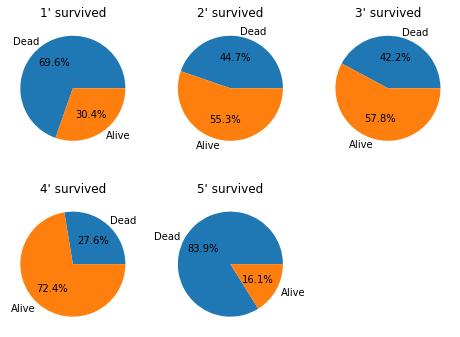

Survived,Dead,Alive
Family,,
1,374,163
2,72,89
3,43,59
4,8,21
5,52,10


In [13]:
train['Family'] = train['SibSp'] + train['Parch'] + 1
train.loc[train["Family"] > 4, "Family"] = 5
    
train['IsAlone'] = 1
train.loc[train['Family'] > 1, 'IsAlone'] = 0

c = show_pie_chart(train, 'Family')
c

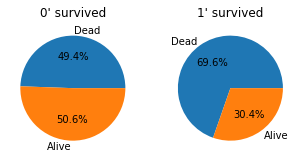

Survived,Dead,Alive
IsAlone,,
0,175,179
1,374,163


In [14]:
c = show_pie_chart(train, 'IsAlone')
c

# Ticket
티켓 정보에 있는 영문자를 이용해서 생존률을 확인해 보겠습니다. 티켓정보를 공백을 기준으로 분할하고 마지막 숫자의 첫번째 글자만 분할합니다. `factorize`를 이용하여 카테고리화 합니다. 

> 숫자가 높을 수록 생존률이 높아 지는 것을 확인할 수 있습니다. 

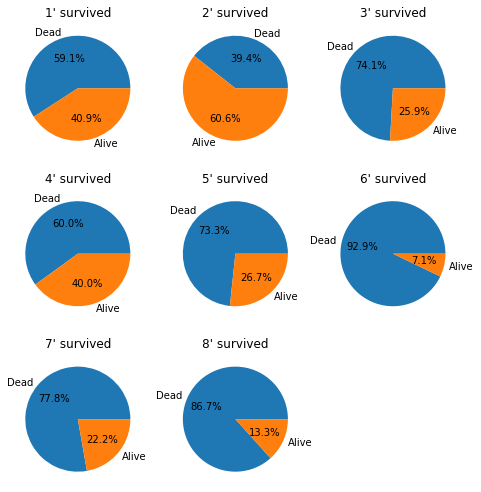

Survived,Dead,Alive
TicketCategory,,
1,136,94
2,91,140
3,272,95
4,6,4
5,11,4
6,13,1
7,7,2
8,13,2


In [15]:
# STON/O2. 3101282를 ['STON/O2.', '3101282']로 변경하고, '3101282'의 첫 번째 3을 선택 
train['TicketCategory'] = train.Ticket.str.split() # 공백으로 분리 
train['TicketCategory'] = [i[-1][0] for i in train['TicketCategory']] # 
train['TicketCategory'] = train['TicketCategory'].replace(['8', '9', 'L'], '8')
train['TicketCategory'] = pd.factorize(train['TicketCategory'])[0] + 1

c = show_pie_chart(train, 'TicketCategory')
c

# 마무리 
지금 까지 각 칼럼과 생존여부의 관계를 확인해 보았습니다. 주로 여자이고, 높은 쪽에 위치한 비싼 방에 있을 수록 생존률이 높아 지는 것을 확인할 수 있었습니다. 